# CWordTM Toolkit Usage on BBC News

This Jupyter notebook demonstrates how to use the package "CWordTM" 
on the BBC News:

1. Meta Information Features
1. Utility Features
1. Text Visualization - Word Cloud
1. Text Summarization
1. Topic Modeling - LDA and BERTopic

## 1. Meta Information Features

In [1]:
import cwordtm
from cwordtm import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnnyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnnyc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnnyc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\johnnyc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
cwordtm.__version__

'0.6.2'

In [3]:
# Show brief module information
print(meta.get_module_info())

The member information of the module 'cwordtm'
1. Submodule meta:
   addin (func)
   addin_all (modname='cwordtm')
   addin_all_functions (submod)
   get_function (mod_name, submodules, func_name)
   get_module_info (detailed=False)
   get_submodule_info (submodname, detailed=False)
   import_module (name, package=None)
   wraps (wrapped, assigned=('__module__', '__name__', '__qualname__', '__doc__', '__annotations__'), updated=('__dict__',))
2. Submodule pivot:
   stat (df, chi=False, *, timing=False, code=0)
3. Submodule quot:
   extract_quotation (text, quot_marks, *, timing=False, code=0)
   match_text (target, sent_tokens, lang, threshold, n=5, *, timing=False, code=0)
   match_verse (i, ot_list, otdf, df, book, chap, verse, lang, threshold, *, timing=False, code=0)
   show_quot (target, source='ot', lang='en', threshold=0.5, *, timing=False, code=0)
   tokenize (sentence, *, timing=False, code=0)
4. Submodule ta:
   get_sent_scores (sentences, diction, sent_len, *, timing=False, 

In [4]:
# Show detailed module information of a submodule
print(meta.get_submodule_info("viz", detailed=True))

The function(s) of the submodule 'cwordtm.viz':

def chi_wordcloud(docs, figsize=(15, 10), bg='white', image=0):
    """Prepare and show a Chinese wordcloud

    :param docs: The collection of Chinese documents for preparing a wordcloud,
        default to None
    :type docs: pandas.DataFrame
    :param figsize: Size (width, height) of word cloud, default to (15, 10)
    :type figsize: tuple, optional
    :param bg: The background color (name) of the wordcloud, default to 'white'
    :type bg: str, optional
    :param image: The filename of the presribed image as the mask of the wordcloud,
        or 1/2/3/4 for using an internal image (heart / disc / triangle / arrow),
        default to 0 (No image mask)
    :type image: int or str, optional
    """

    util.set_lang('chi')
    diction = util.get_diction(docs)

    masks = ['heart.jpg', 'disc.jpg', 'triangle.jpg', 'arrow.jpg']

    if image == 0:
        mask = None
    elif image in [1, 2, 3, 4]:  # Internal image file
        img

In [5]:
# Show execution time
df = util.load_text("BBC/BBC News Train.csv", timing=True)

Finished 'load_text' in 0.0668 secs


In [6]:
# Execute and show code
df = util.load_text("BBC/BBC News Train.csv", code=1)


def load_text(filepath, nr=0, info=False):
    """Loads and returns the text from the prescribed file path ('filepath').

    :param filepath: The prescribed filepath from which the text is loaded,
        default to None
    :type filepath: str
    :param nr: The number of rows of text to be loaded; 0 represents all rows,
        default to 0
    :type nr: int, optional
    :param info: The flag whether the dataset information is shown,
        default to False
    :type info: bool, optional
    :return: The collection of text with the prescribed number of rows loaded
    :rtype: pandas.DataFrame
    """

    # print("Loading file '%s' ..." %filepath)
    if filepath.lower().endswith('csv'):
        nrows = None
        if nr > 0: nrows = nr
        df = pd.read_csv(filepath, nrows=nrows, encoding='utf-8')
    else:
        noise_list = ['\u3000', '─ ', '•']
        tf =  open(filepath, encoding='utf-8')
        lines = [remove_noise(line, noise_list) for line in tf.readlines() \
   

In [7]:
# Show code without execution
df = util.load_text("BBC/BBC News Train.csv", code=2)


def load_text(filepath, nr=0, info=False):
    """Loads and returns the text from the prescribed file path ('filepath').

    :param filepath: The prescribed filepath from which the text is loaded,
        default to None
    :type filepath: str
    :param nr: The number of rows of text to be loaded; 0 represents all rows,
        default to 0
    :type nr: int, optional
    :param info: The flag whether the dataset information is shown,
        default to False
    :type info: bool, optional
    :return: The collection of text with the prescribed number of rows loaded
    :rtype: pandas.DataFrame
    """

    # print("Loading file '%s' ..." %filepath)
    if filepath.lower().endswith('csv'):
        nrows = None
        if nr > 0: nrows = nr
        df = pd.read_csv(filepath, nrows=nrows, encoding='utf-8')
    else:
        noise_list = ['\u3000', '─ ', '•']
        tf =  open(filepath, encoding='utf-8')
        lines = [remove_noise(line, noise_list) for line in tf.readlines() \
   

In [8]:
# Add timing and code reveal features to some other function
from importlib_resources import files
files = meta.addin(files)
files(code=2)


@package_to_anchor
def files(anchor: Optional[Anchor] = None) -> Traversable:
    """
    Get a Traversable resource for an anchor.
    """
    return from_package(resolve(anchor))




## 2. Utility Features

### Load BBC News

In [9]:
bbc_file = "BBC/BBC News Train.csv"
df = util.load_text(bbc_file, info=True)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


### Preprocessing Text

In [10]:
text_list = util.get_text_list(df.iloc[:500], text_col='Text')
text = util.preprocess_text(text_list)

## 3. Text Visualization - Word Cloud

D:\Dev\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


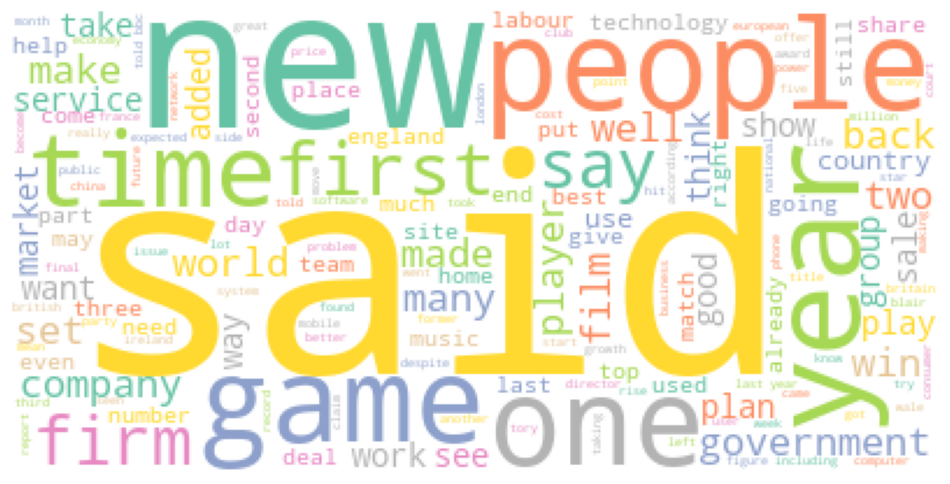

In [11]:
# White background with no image mask
viz.show_wordcloud(text)

D:\Dev\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


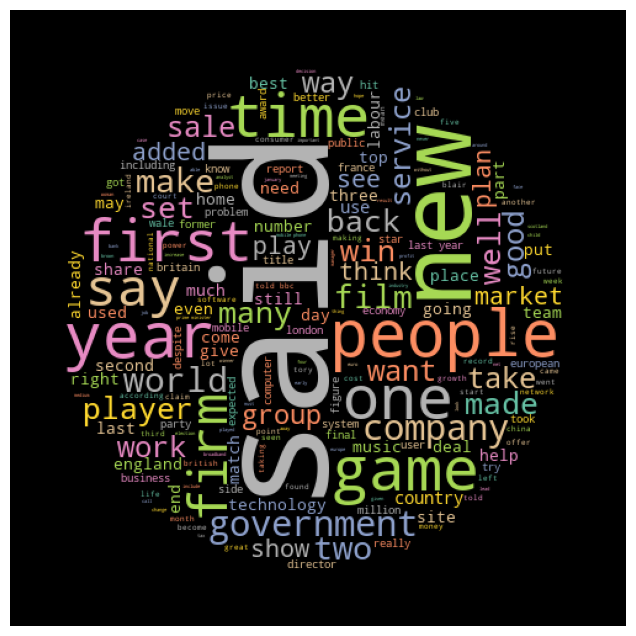

In [12]:
# Black background with the prescribed image as the mask
viz.show_wordcloud(text, bg='black', image='images/disc.png')

## 4. Text Summarization

In [13]:
news = df.iloc[:5]['Text']  # "df" stores previously loaded text
ta.summary_en(news, sent_len=5)

['but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom.',
 'cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud.',
 'prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates.',
 'the university of california said the trial in the case is scheduled to begin in october 2006. it joined the lawsuit in december 2001alleging  massive insider trading  and fraud  claiming it had lost $145m on its investments in the company.',
 'th

## 5. Topic Modeling

### LDA Model

In [14]:
doc_file = "BBC/BBC News Train.csv"
lda = tm.lda_process(doc_file, source=1, text_col='Text', eval=True)

Corpus loaded!
Text preprocessed!
Text trained!
If no visualization is shown,
  you may execute the following commands to show the visualization:
    > import pyLDAvis
    > pyLDAvis.display(lda.vis_data)
Visualization prepared!

Topics from LDA Model:
[(0,
  '0.019*"" + 0.013*"s" + 0.011*"game" + 0.009*"roddick" + 0.007*"said" + '
  '0.006*"nadal" + 0.006*"break" + 0.004*"point" + 0.004*"ball" + '
  '0.004*"minut"'),
 (1,
  '0.018*"s" + 0.015*"o" + 0.014*"said" + 0.009*"ireland" + 0.008*"" + '
  '0.007*"mr" + 0.006*"home" + 0.006*"arrest" + 0.006*"hous" + 0.005*"terror"'),
 (2,
  '0.016*"softwar" + 0.016*"s" + 0.013*"program" + 0.012*"microsoft" + '
  '0.009*"" + 0.009*"secur" + 0.009*"said" + 0.008*"user" + 0.007*"patent" + '
  '0.007*"spywar"'),
 (3,
  '0.028*"" + 0.022*"said" + 0.014*"s" + 0.006*"mr" + 0.006*"peopl" + '
  '0.005*"game" + 0.005*"year" + 0.005*"govern" + 0.005*"say" + 0.005*"use"'),
 (4,
  '0.029*"" + 0.024*"m" + 0.020*"s" + 0.009*"year" + 0.009*"world" + '
  '0.008*

In [15]:
# LDA Model Visualization
import pyLDAvis
pyLDAvis.display(lda.vis_data)

### BERTopic Model

In [16]:
btm = tm.btm_process(doc_file, source=1, text_col='Text', eval=True)

Corpus loaded!
Text preprocessed!


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
D:\Dev\Anaconda3\lib\site-packages\hdbscan\hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2

Text trained!

Topics from BERTopic Model:
Topic 1: said | mr | govern | year | bn | elect | say | labour | parti | minist
Topic 5: film | best | award | star | actor | oscar | nomin | director | actress | year
Topic 7: england | ireland | wale | game | rugbi | win | play | half | franc | player
Topic 4: music | band | album | song | chart | record | singl | singer | year | perform
Topic 6: club | chelsea | unit | arsenal | leagu | goal | game | play | liverpool | player
Topic 3: open | roddick | seed | match | australian | play | nadal | set | win | final
Topic 10: gadget | comput | technolog | use | devic | digit | mac | peopl | appl | make
Topic 9: virus | mail | spam | site | secur | user | program | attack | use | softwar
Topic 0: olymp | holm | race | world | indoor | champion | radcliff | championship | marathon | athlet
Topic 12: mobil | phone | camera | use | handset | peopl | servic | music | technolog | said
Topic 11: search | blog | file | googl | web | peopl | use | said |

D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\Dev\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



  If no visualization is shown,
    you may execute the following commands one-by-one:
      btm.model.visualize_topics()
      btm.model.visualize_barchart()
      btm.model.visualize_heatmap()

